In [1]:
import numpy as np
import skimage as ski

from scipy.signal import find_peaks, butter, filtfilt
import matplotlib.pyplot as plt

In [2]:
# Load the sample image

I = ski.io.imread("track.jpg")

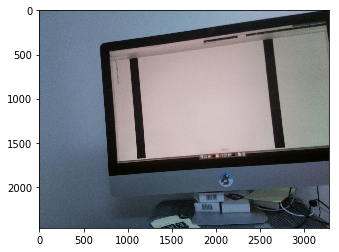

In [23]:
plt.imshow(I)

In [3]:
# Print the image dimensions in pixels

I.shape

(2464, 3280, 3)

In [10]:
# Conversion to gray
Ibw = ski.color.rgb2gray(I)

In [11]:
# Since the image has a black line on a white background 
# we invert the image by substracting it from its maximum value.
# We also select a smaller region of interest

ROI = Ibw.max() - Ibw[1350:1400, 1000:3000]

In [13]:
# Print the minimum and the maximum values

ROI.min(), ROI.max()

(0.0042043137254902385, 0.7542717647058824)

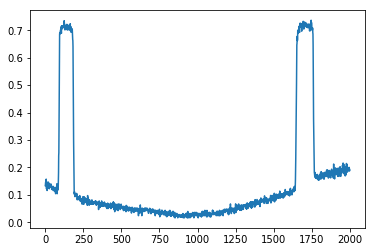

In [14]:
# Select the 25th row in the image for line detection
L = ROI[25]

# Plot the intensities across this row
plt.plot(L)

In [15]:
# Due to the noise in the image the algorithm finds many peaks heigher than 0.5
find_peaks(L, height=0.5)

(array([  95,  104,  107,  111,  113,  117,  119,  122,  124,  130,  133,
         137,  139,  142,  146,  149,  151,  157,  160,  164,  168,  171,
         176, 1655, 1658, 1662, 1666, 1672, 1674, 1682, 1688, 1691, 1694,
        1702, 1705, 1710, 1714, 1718, 1721, 1724, 1727, 1729, 1734, 1737,
        1740, 1743, 1746, 1748, 1753, 1755], dtype=int32),
 {'peak_heights': array([0.69148196, 0.71252627, 0.71644784, 0.71252627, 0.71644784,
         0.71644784, 0.71644784, 0.72763922, 0.73491686, 0.71701333,
         0.71701333, 0.71701333, 0.7209349 , 0.7209349 , 0.7209349 ,
         0.71644784, 0.71701333, 0.71701333, 0.71701333, 0.72402314,
         0.71309176, 0.70441529, 0.70524863, 0.67834118, 0.70019608,
         0.69881216, 0.71449843, 0.71785451, 0.72626314, 0.72234157,
         0.72485647, 0.72402314, 0.73269961, 0.73017686, 0.72794471,
         0.72822745, 0.72152314, 0.72038431, 0.72233373, 0.72038431,
         0.72038431, 0.72233373, 0.72233373, 0.71309176, 0.71646275,
        

In [16]:
# To filter the noise in the image we use a 3rd order Butterworth filter

# Wn = 0.02, the cut-off frequency, acceptable values are from 0 to 1
b, a = butter(3, 0.02)

In [17]:
# Filter the selected row in the image using the above filter coefficients a, b
Lf = filtfilt(b, a, L)

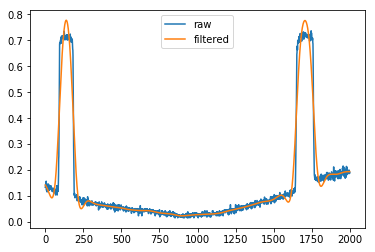

In [19]:
# Plot the pixel intensities along the selected row
plt.plot(L, label="raw")
plt.plot(Lf, label="filtered")

plt.legend()

In [20]:
# Find the two peaks in the filtered data
find_peaks(Lf, height=0.5)

(array([ 138, 1705], dtype=int32),
 {'peak_heights': array([0.77735371, 0.7762023 ])})

In [22]:
%%timeit

## Estimate the run time of the line detection algorithm

# Select the 25th row in the image for line detection
L = ROI[25]

# To filter the noise in the image we use a 3rd order Butterworth filter
b, a = butter(3, 0.02)

# Smooth the transitions so we can detect the peaks 
Lf = filtfilt(b, a, L)

# Find peaks which are higher than 0.5
p = find_peaks(Lf, height=0.5)

2.86 ms ± 10.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
